# Test 1

In [1]:
import numpy as np
from lucifex.fdm import AB2, CN
from lucifex.sim import run, xdmf_to_npz
from lucifex.utils import grid, spacetime_grid, cross_section
from lucifex.viz import plot_colormap, create_animation, plot_line, save_figure, display_animation
from crocodil.dns.system_a import dns_system_a

STORE = 1
WRITE = None
DIR_BASE = './data'
DIR_PARAMS = ('Nx', 'Ny')

sr = 0.2
simulation = dns_system_a(
    store_delta=STORE, 
    write_delta=WRITE, 
    dir_base=DIR_BASE, 
    dir_params=DIR_PARAMS,
    dir_timestamp=True,
)(
    aspect=2.0,
    Nx=64,
    Ny=64,
    Ra=5e2,
    Da=100.0,
    epsilon=1e-2,
    sr=sr,
    cr=0.0,
    s_limits=(0, sr),
    c_limits=(0, 1),
    c_stabilization=None,
    diagnostic=True,
)

n_stop = 20
dt_init = 1e-6
n_init = 10
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)
if WRITE:
    xdmf_to_npz(simulation, delete_xdmf=False)

c, s, u, psi = simulation['c', 's', 'u', 'psi']
cCorr, sCorr = simulation['cCorr', 'sCorr']
mC, mD = simulation['mC', 'mD']
f, fBoundary = simulation['f', 'fBoundary']
fInterface, fPlus, fMinus = f.sub(0), f.sub(1), f.sub(2)
sMinMax, cMinMax, uMinMax = simulation['sMinMax', 'cMinMax', 'uMinMax']
cMin, cMax = cMinMax.sub(0), cMinMax.sub(1) 
uMax = uMinMax.sub(1)
dt, dtCFL, dtK = simulation['dt', 'dtCFL', 'dtK']

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x$', ylabel='$y$'>)

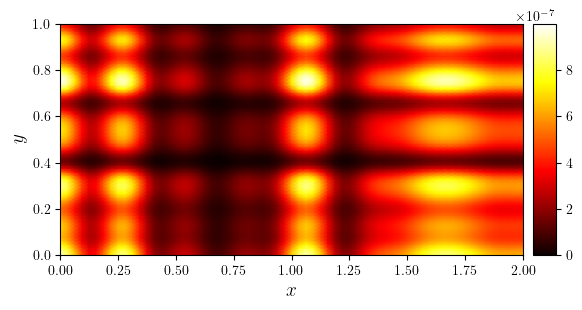

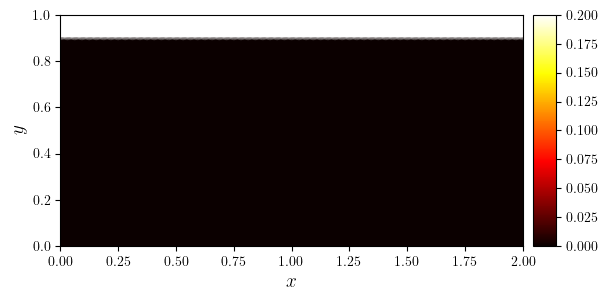

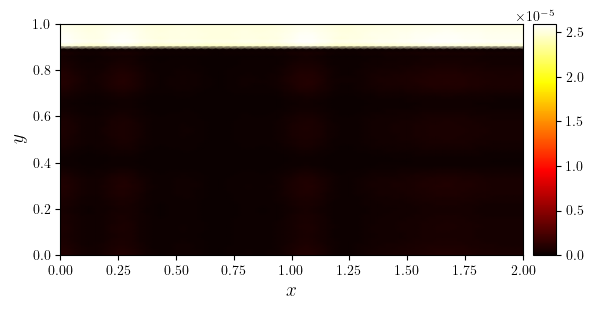

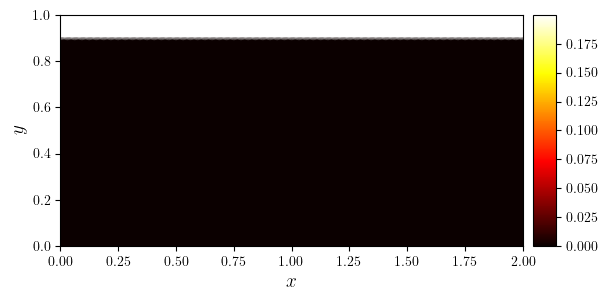

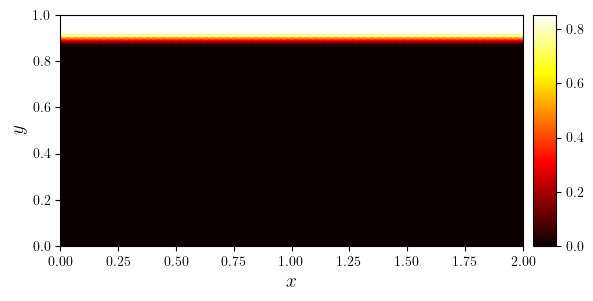

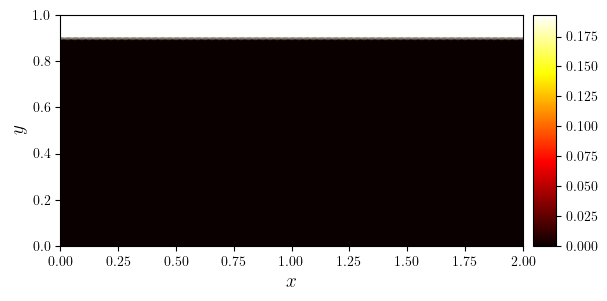

In [3]:
plot_colormap(c.series[0])
plot_colormap(s.series[0])
plot_colormap(c.series[1])
plot_colormap(s.series[1])
plot_colormap(c.series[-1])
plot_colormap(s.series[-1])

In [ ]:
time_slice = slice(0, None, 2)
titles = [f'$c(t={t:.3f})$' for t in c.time_series[time_slice]]

anim = create_animation(
    plot_colormap,
    colorbar=False,
)(c.series[time_slice], title=titles)
anim_path = save_figure(f'{c.name}(t)', get_path=True)(anim)

display_animation(anim_path)